<a href="https://colab.research.google.com/github/kdurai/DeepLearning/blob/master/0304_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
(0.265-0.5)

-0.235

In [0]:
(0.265-0.5)*2

-0.47

In [0]:
(0.265-0.5)**2

0.055224999999999996

In [0]:
((0.265-0.5)**2 + (0.73-0.5)**2 + (0.952-0.5)**2 + (0.994-0.5)**2 + (0.999-0.5)**2 )/5

0.1610932

In [0]:
x1=3;x2=4;x3=5;x4=6;x5=8;w=3;b=-2

In [0]:
import math

In [0]:
math.exp(1.1)/(math.exp(2.1) + math.exp(4.5) + math.exp(1.1))

0.029689111764296342

In [0]:
1/(1+math.exp(-0.52))

0.6271477663131956

In [0]:
math.log(0.03,2)

-5.058893689053569

In [0]:
y1=(1/(1+math.exp(-(w*x1+b))));y2=(1/(1+math.exp(-(w*x2+b))));y3=(1/(1+math.exp(-(w*x3+b))));y4=(1/(1+math.exp(-(w*x4+b))));y5=(1/(1+math.exp(-(w*x5+b))));

In [0]:
y1_actual=0.268;y2_actual=0.73;y3_actual=0.952;y4_actual=0.994;y5_actual=0.999

In [0]:
error=math.sqrt(((y1_actual - y1)**2 + (y2_actual - y2)**2 + (y3_actual - y3)**2 + (y4_actual - y4)**2 + (y5_actual - y5)**2)/5)

In [0]:
error

0.34920117982061655

#Plotting Sigmoid Functioon

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w * x + b)))

In [0]:
sigmoid(1,0.5,0)

0.6224593312018546

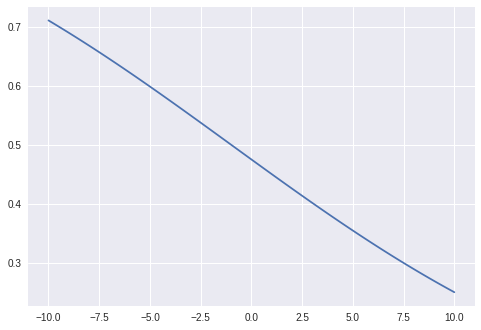

In [0]:
w = -0.1 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.1 #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1 * x1 + w2 * x2 + b)))

In [0]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape )

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 0.5
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

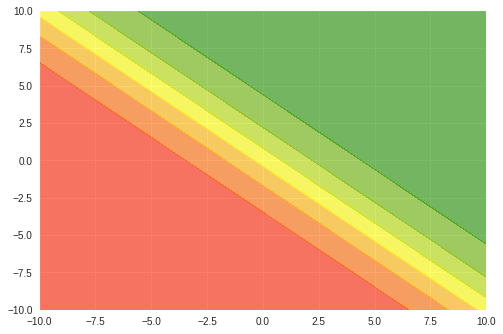

In [0]:
 plt.contourf(XX1,XX2,Y,cmap = my_cmap, alpha=0.6)

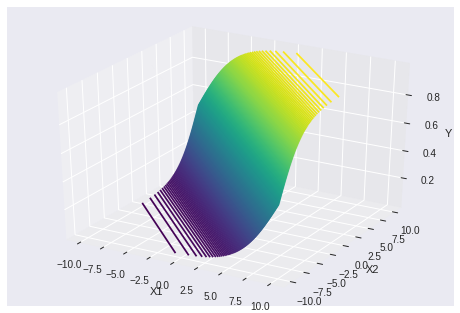

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');

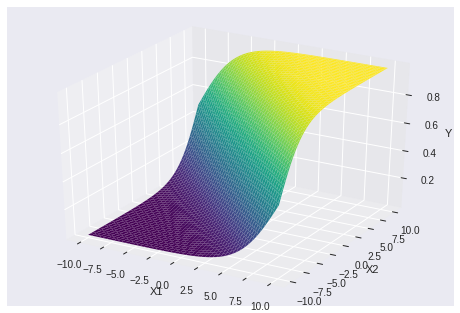

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');

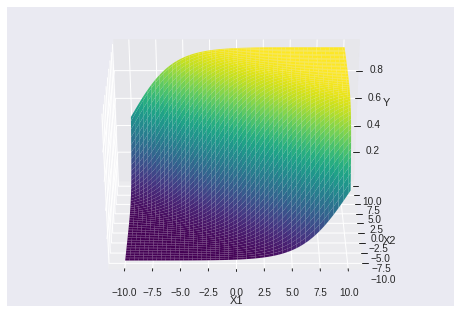

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(30,270)

# Compuete Loss for a Given Dataset

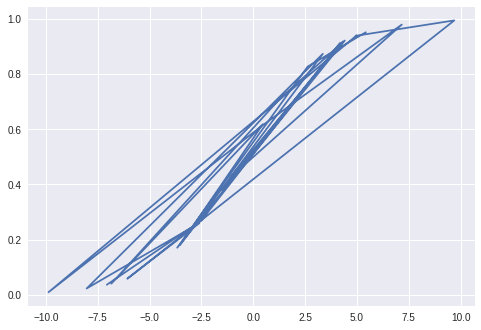

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

plt.plot(X,Y)
plt.show()

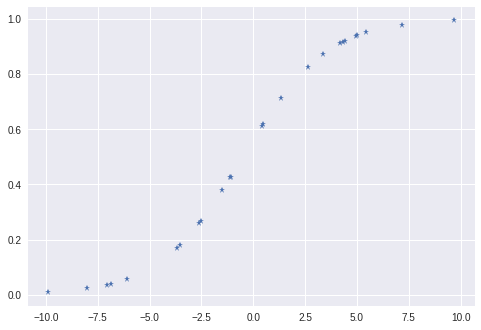

In [0]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0;
  
  for x, y in zip(X,Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  
  return loss;

In [0]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [0]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j], BB[i,j])

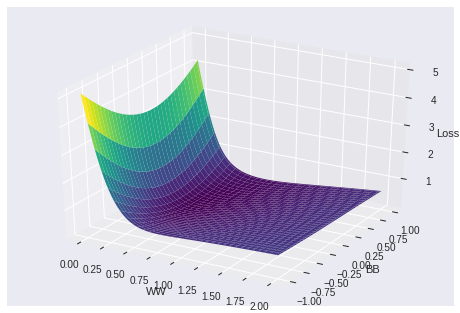

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('WW')
ax.set_ylabel('BB')
ax.set_zlabel('Loss');

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [0]:
i, j

(62, 25)

In [0]:
print(WW[i,j], BB[i,j])

0.5 0.24


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
   
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise=True):
    
    #initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
                             
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5],[4, -1],[1, -4],[3, 1.25],[2, 4],[1, 5]])
Y = [1,1,1,0,0,0]

In [0]:
def plot_sn(X, Y, sn):
  X1 = np.linspace(-10,10,100)
  Y1 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron)

  plt.contourf(XX1,XX2,YY,cmap = my_cmap, alpha = 0.6)
  plt.scatter(X,)

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
print(sn.w, sn.b)

[[ 1.0082849  -0.68807758]] [-0.04671165]


# Load Data

In [0]:
import pandas as pd

In [0]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-03-15 01:17:20--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-03-15 01:17:20--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c0947e42d11dd32918469501a.dl.dropboxusercontent.com/cd/0/inline/AdFYp3C0Jhu2Br1s8miR8jGHKOPsCM7O7LMB45tPDkGa4ZtodsG937vowQcIUuyd1XoMZwC9yQx-zi0CXyiyTdi4XoluoIbAD-RBKMZNWzptk0ETgMlo_C-CSRjcZDK-tSo/file# [following]
--2019-03-15 01:17:20--  https://uc8c0947e42d11dd32918469501a.dl.dropboxusercontent.com/cd/0/inline/AdFYp3C0Jhu2Br1s8miR8jGHKOPsCM7O7LMB45tPDkGa4ZtodsG937vowQcIUuyd1XoMZwC9yQx-zi0CXyiyTdi4XoluoIbA

In [0]:
!ls -lrt

total 80
drwxr-xr-x 1 root root  4096 Mar  8 17:26 sample_data
-rw-r--r-- 1 root root 69685 Mar 15 01:17 mobile_cleaned.csv


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [0]:
data.shape

(341, 88)

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating', axis = 1)

In [0]:
Y = data['Rating'].values

In [0]:
type(Y)

numpy.ndarray

In [0]:
threashold = 4.2
data['Class'] = (data['Rating'] >= threashold).astype(np.int)

In [0]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

 # Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100,1])

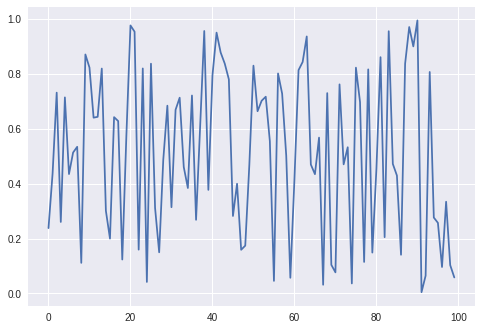

In [0]:
plt.plot(R)
plt.show()

In [0]:
np.mean(R)

0.5148760439563815

In [0]:
np.std(R)

0.29442592462781475

In [0]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaler.mean_

array([0.51487604])

In [0]:
RT = scaler.transform(R)

In [0]:
np.mean(RT)

-3.907985046680551e-16

In [0]:
np.std(RT)

1.0

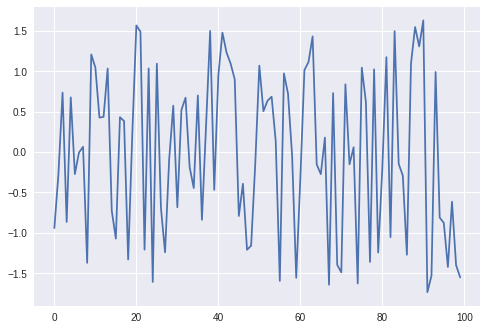

In [0]:
plt.plot(RT)
plt.show()

In [0]:
X1 = np.linspace(-10,10,10)
X2 = np.linspace(-10,10,10)

XX1,XX2 = np.meshgrid(X1,X2)

In [0]:
X1,X2,XX1,XX2

(array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
         -1.11111111,   1.11111111,   3.33333333,   5.55555556,
          7.77777778,  10.        ]),
 array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
         -1.11111111,   1.11111111,   3.33333333,   5.55555556,
          7.77777778,  10.        ]),
 array([[-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
          -1.11111111,   1.11111111,   3.33333333,   5.55555556,
           7.77777778,  10.        ],
        [-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
          -1.11111111,   1.11111111,   3.33333333,   5.55555556,
           7.77777778,  10.        ],
        [-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
          -1.11111111,   1.11111111,   3.33333333,   5.55555556,
           7.77777778,  10.        ],
        [-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
          -1.11111111,   1.11111111,   3.33333333,   5.55555556,
           7.77777778,  10.       

In [0]:
X = np.random.random(25)

In [0]:
X

array([0.33637995, 0.352403  , 0.23016914, 0.8650194 , 0.25082732,
       0.74520089, 0.64246403, 0.8294246 , 0.51437397, 0.26416335,
       0.11171445, 0.68026634, 0.08676928, 0.50396499, 0.03206094,
       0.42538283, 0.07922303, 0.00487154, 0.55152173, 0.36118182,
       0.10113757, 0.3260623 , 0.67839278, 0.24251213, 0.28513546])

In [0]:
X * 40 - 20

array([ -6.54480186,  -5.90388005, -10.79323441,  14.60077594,
        -9.9669072 ,   9.80803572,   5.69856115,  13.17698409,
         0.57495872,  -9.433466  , -15.53142187,   7.21065368,
       -16.52922865,   0.15859975, -18.71756235,  -2.98468682,
       -16.83107868, -19.80513857,   2.06086905,  -5.55272713,
       -15.95449738,  -6.95750788,   7.13571111, -10.29951487,
        -8.59458146])

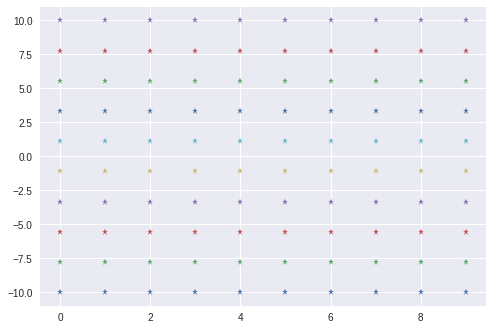

In [0]:
plt.plot(XX1,'*')

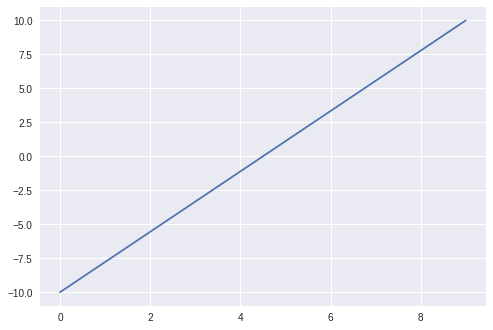

In [0]:
plt.plot(X2)

In [0]:
np.random.randn(1,10)

array([[ 0.78411872,  0.69179271,  0.82110184,  0.2873772 ,  0.28914613,
         0.62327847, -1.14861849,  1.42869224,  1.42857747,  0.7726279 ]])